In [288]:
import numpy as np
import pandas as pd

import wikipedia
%matplotlib inline

In [289]:
# https://dumps.wikimedia.org/other/pagecounts-raw/
# dataset depreceted since 2016

### Wikipedia API

In [292]:
# top results for the search query on wikipedia
wikipedia.search("Computer science")

['Computer science',
 'Computer graphics (computer science)',
 'Bachelor of Computer Science',
 'Integer (computer science)',
 'Computer Science and Engineering',
 'History of computer science',
 'Outline of computer science',
 'Recursion (computer science)',
 'Ontology (information science)',
 'AP Computer Science']

In [293]:
wikipedia.search("Machine Learning")

['Machine learning',
 'Active learning (machine learning)',
 'Quantum machine learning',
 'Outline of machine learning',
 'Adversarial machine learning',
 'Supervised learning',
 'Deep learning',
 'List of datasets for machine learning research',
 'Online machine learning',
 'Weka (machine learning)']

In [294]:
ml = wikipedia.page("machine learning")

In [295]:
ml.title

'Machine learning'

In [55]:
ml.url

'https://en.wikipedia.org/wiki/Machine_learning'

In [287]:
# extrac the content of the wikipedia page
ml.content[0:100]

'Machine learning is a field of computer science that gives computer systems the ability to "learn" ('

### Pageviewapi

In [296]:
# https://pypi.python.org/pypi/pageviewapi/0.4.0
# Wikimedia Pageview API client
import pageviewapi

In [299]:
# enter a keyword to search for in the wikipedia
query = "deep feature synthesis"

In [300]:
# get the first search result page on wikipedia
article = wikipedia.search(query)[0]

# aggreate by month
granularity = 'monthly'


from_year = '2017'
from_month = '01'
from_day = '01'
from_date = from_year + from_month + from_day + '00'


to_year = '2018'
to_month = '01'
to_day = '01'
to_date = to_year + to_month + to_day + '00'


api_call = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/' + str(article) + '/' + granularity + '/' + from_date + '/' + to_date
api_call

'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Feature engineering/monthly/2017010100/2018010100'

In [301]:
page_views = pd.read_json(api_call)

In [302]:
page_views['items']

0     {'timestamp': '2017010100', 'project': 'en.wik...
1     {'timestamp': '2017020100', 'project': 'en.wik...
2     {'timestamp': '2017030100', 'project': 'en.wik...
3     {'timestamp': '2017040100', 'project': 'en.wik...
4     {'timestamp': '2017050100', 'project': 'en.wik...
5     {'timestamp': '2017060100', 'project': 'en.wik...
6     {'timestamp': '2017070100', 'project': 'en.wik...
7     {'timestamp': '2017080100', 'project': 'en.wik...
8     {'timestamp': '2017090100', 'project': 'en.wik...
9     {'timestamp': '2017100100', 'project': 'en.wik...
10    {'timestamp': '2017110100', 'project': 'en.wik...
11    {'timestamp': '2017120100', 'project': 'en.wik...
Name: items, dtype: object

In [303]:
page_views['items'][0]

{'access': 'all-access',
 'agent': 'all-agents',
 'article': 'Feature_engineering',
 'granularity': 'monthly',
 'project': 'en.wikipedia',
 'timestamp': '2017010100',
 'views': 5233}

In [304]:
monthly_views = pd.DataFrame()
monthly_views['months'] = pd.Series([month['timestamp'] for month in page_views['items']])
monthly_views['views'] = pd.Series([month['views'] for month in page_views['items']])

In [305]:
monthly_views = monthly_views.set_index('months')
monthly_views

,views
months,
2017010100,5233
2017020100,5068
2017030100,5669
2017040100,5597
2017050100,5914
2017060100,6040
2017070100,5830
2017080100,6098
2017090100,6340


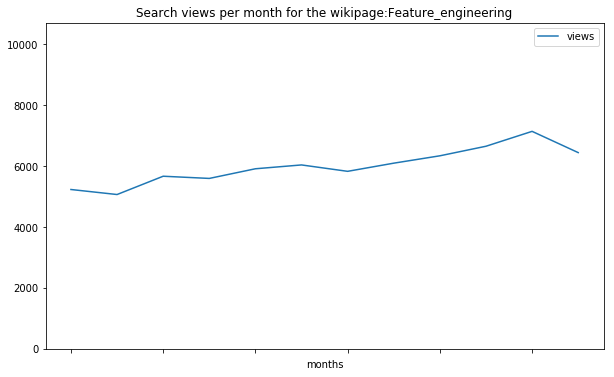

In [314]:
plot = monthly_views.plot(kind='line', ylim=(0,max(monthly_views['views']*1.5)), figsize=(10,6), title="Search views per month for the wikipage:" + page_views['items'][0]['article']);
plot;